In [1]:
#Import Libraries
import pandas as pd
import idx2numpy
import os
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
#Generate mapping file that has ALabel to ASCII to Character mapping
try:
    class_labels = pd.read_pickle("../../data/class_label_mapping.pkl")
except:
    with open("../../source/balanced/emnist-balanced-mapping.txt") as f:
        class_labels = pd.DataFrame([label.split() for label in f.readlines()], columns=['class_label','ascii_code'])
        class_labels = class_labels.astype(int)
        class_labels['character'] = class_labels['ascii_code'].apply(lambda x:chr(x))
        class_labels.to_pickle("../../data/class_label_mapping.pkl")

#class to character mapping
class_labels = class_labels[['class_label','character']].set_index('class_label').T.to_dict('list')

In [3]:
#Unzipped file from dataset source containing train-images, train-labels, test-images, test-labels
for filename in os.listdir("../../source/balanced_raw/"):
    
    data_array = idx2numpy.convert_from_file("../../source/balanced_raw/"+filename)
    
    #convert array to image and store in disk
    if "images" in filename:
        if not os.path.isdir("../../data/source_dataset/"+filename.split("-")[0]+"/"+filename.split("-")[1]):
            os.makedirs("../../data/source_dataset/"+filename.split("-")[0]+"/"+filename.split("-")[1])
        for idx,img in tqdm(enumerate(data_array)):
            cv2.imwrite("../../data/source_dataset/"+filename.split("-")[0]+"/"+filename.split("-")[1]+"/"+filename.split("-")[0]+str(idx)+".jpg", img.T)
    
    #create a dataset having class_label, character and path to the image
    else:
        if not os.path.isdir("../../data/source_dataset/"+filename.split("-")[0]+"/"+filename.split("-")[1]):
            os.makedirs("../../data/source_dataset/"+filename.split("-")[0]+"/"+filename.split("-")[1])
        directory = os.path.abspath("../../data/source_dataset/")
        dataset = pd.DataFrame({"class_label":data_array})
        dataset["character"] = dataset['class_label'].apply(lambda x:class_labels[x][0])
        dataset["file_path"] = [directory+"\\"+filename.split("-")[0]+"\\"+"images"+"\\"+filename.split("-")[0]+str(x) + ".jpg" for x in list(dataset.index)]
        dataset.to_pickle("../../data/source_dataset/"+filename.split("-")[0]+"/"+filename.split("-")[1]+"/"+filename+".pkl")

18800it [00:03, 4754.62it/s]
112800it [00:32, 3520.45it/s]


In [4]:
#read stored datasets
train_dataset = pd.read_pickle("../../data/source_dataset/train/labels/train-labels.pkl")
test_dataset = pd.read_pickle("../../data/source_dataset/test/labels/test-labels.pkl")

In [5]:
train_dataset

,class_label,character,file_path
0,45,r,E:\active_learning\data\source_dataset\train\i...
1,36,a,E:\active_learning\data\source_dataset\train\i...
2,43,n,E:\active_learning\data\source_dataset\train\i...
3,15,F,E:\active_learning\data\source_dataset\train\i...
4,4,4,E:\active_learning\data\source_dataset\train\i...
...,...,...,...
112795,22,M,E:\active_learning\data\source_dataset\train\i...
112796,17,H,E:\active_learning\data\source_dataset\train\i...
112797,23,N,E:\active_learning\data\source_dataset\train\i...
112798,31,V,E:\active_learning\data\source_dataset\train\i...


In [6]:
test_dataset

,class_label,character,file_path
0,41,g,E:\active_learning\data\source_dataset\test\im...
1,39,e,E:\active_learning\data\source_dataset\test\im...
2,9,9,E:\active_learning\data\source_dataset\test\im...
3,26,Q,E:\active_learning\data\source_dataset\test\im...
4,44,q,E:\active_learning\data\source_dataset\test\im...
...,...,...,...
18795,45,r,E:\active_learning\data\source_dataset\test\im...
18796,15,F,E:\active_learning\data\source_dataset\test\im...
18797,1,1,E:\active_learning\data\source_dataset\test\im...
18798,26,Q,E:\active_learning\data\source_dataset\test\im...


Chracter:  r


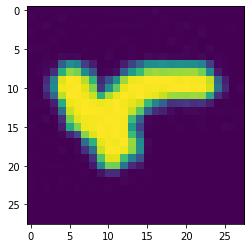

In [9]:
#Sample train image
print("Chracter: ", train_dataset.loc[0]["character"])
img = cv2.imread(train_dataset.loc[0]["file_path"],0)
plt.imshow(img)
plt.show()

Chracter:  g


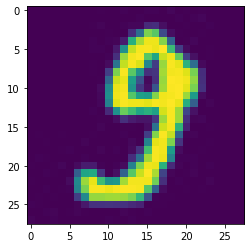

In [10]:
#Sample test image
print("Chracter: ", test_dataset.loc[0]["character"])
img = cv2.imread(test_dataset.loc[0]["file_path"],0)
plt.imshow(img)
plt.show()